In [1]:
# import statements
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
def replace_nan(dset):
    # Replace NaN Value
    for col in dset.select_dtypes(exclude=['int64','float64']).columns.values:
        dset[col].fillna('UNKNOWN',inplace=True)

    for col in dset.select_dtypes(['int64','float64']).columns.values:
        dset[col].fillna(0,inplace=True)
    return dset

In [6]:
#import raw data and convert rank to scoring
mt_rank = pd.read_csv('PAIR_2018_INPUT_IDENTITY_ADJUSTED.csv').fillna(0)
mt_scoring = mt_rank.copy()
scoring_transform = pd.DataFrame({'rank':[1,2,3,4,5,6,7,8],'score':[13,8,5,3,2,1,1,1]})
mt_scoring.replace(scoring_transform.set_index('rank').score.to_dict(),inplace=True)

#calculate sum score for pair
pair_score = mt_scoring.loc[:,'PAIR1':'PAIR18'].sum()
pair_score.index=list(range(1,19))
#pair_score.sort_values()

In [10]:
scoring_transform.set_index('rank').score.to_dict()

{1: 13, 2: 8, 3: 5, 4: 3, 5: 2, 6: 1, 7: 1, 8: 1}

In [11]:
#pair_input = mt_scoring.drop(['CANDIDATE_ID','SCORE'],axis=1).corr()
pair_input = mt_scoring.drop(['CANDIDATE_ID'],axis=1).corr()
pair_input.index.name = 'Index'
pair_corr_unpivot = pair_input.unstack().reset_index(name='VALUE').rename(columns={'Index': 'PAIR_RELATE'})

In [14]:
pair_corr_unpivot

,level_0,PAIR_RELATE,VALUE
0,PAIR1,PAIR1,1.000000
1,PAIR1,PAIR2,-0.145114
2,PAIR1,PAIR3,0.172253
3,PAIR1,PAIR4,-0.152315
4,PAIR1,PAIR5,0.116451
5,PAIR1,PAIR6,-0.109307
6,PAIR1,PAIR7,-0.248271
7,PAIR1,PAIR8,-0.095667
8,PAIR1,PAIR9,-0.010257
9,PAIR1,PAIR10,0.071832


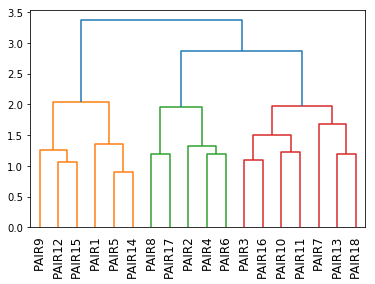

In [15]:
# create dendrogram
pair_dendrogram = sch.dendrogram(sch.linkage(pair_input, method='ward'),leaf_rotation=90,labels=pair_input.index.tolist())

In [16]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
hc_clusters = hc.fit_predict(pair_input)

In [17]:
hc_clusters

array([4, 0, 1, 0, 4, 0, 2, 0, 3, 1, 1, 3, 2, 4, 3, 1, 0, 2])

In [18]:
pair_list =  pd.DataFrame(pair_input.index)
clusters_list = pd.DataFrame(hc_clusters)

In [19]:
cluster_output = pd.merge(pair_list, clusters_list, left_index=True, right_index=True)

In [20]:
cluster_output.sort_values(by=0)

,Index,0
1,PAIR2,0
3,PAIR4,0
5,PAIR6,0
7,PAIR8,0
16,PAIR17,0
2,PAIR3,1
15,PAIR16,1
9,PAIR10,1
10,PAIR11,1
17,PAIR18,2
